<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Tensorflow/blob/main/Notebooks/Tensorflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Neural Network in tensorflow

## Prerequirities

In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# finding access to GPU
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Prepare data

* Create sample data
* deviding data to train and test data sets
* visualization data created
* checking shapes

In [ ]:
# creating sample data
X  = tf.range(-100 , 100 , 4)
y = X + 25
X , y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-75, -71, -67, -63, -59, -55, -51, -47, -43, -39, -35, -31, -27,
        -23, -19, -15, -11,  -7,  -3,   1,   5,   9,  13,  17,  21,  25,
         29,  33,  37,  41,  45,  49,  53,  57,  61,  65,  69,  73,  77,
         81,  85,  89,  93,  97, 101, 105, 109, 113, 117, 121], dtype=int32)>)

In [ ]:
# deviding data to train and test data sets
def train_test_dataset (x,y) :
  X_train , X_test = X[:int(len(X)*0.8)] , X[int(len(X)*0.8):]
  y_train , y_test = y[:int(len(X)*0.8)] , y[int(len(X)*0.8):]
  return X_train , X_test , y_train , y_test
# visalizing created data
def train_test_plot(x,y, predict = None) :
    X_train , X_test = X[:int(len(X)*0.8)] , X[int(len(X)*0.8):]
    y_train , y_test = y[:int(len(X)*0.8)] , y[int(len(X)*0.8):]
    plt.figure(figsize = (6,4)) ;
    plt.scatter(X_train , y_train , c = "b" , label = "train") ;
    plt.scatter(X_test , y_test  , c = "g" , label = "test") ;
    if (predict != None ) :
      plt.scatter(X_test , predict , c = "r" , label = "prediction")
    plt.legend() ;

In [ ]:
X_train , X_test , y_train , y_test = train_test_dataset(X , y)

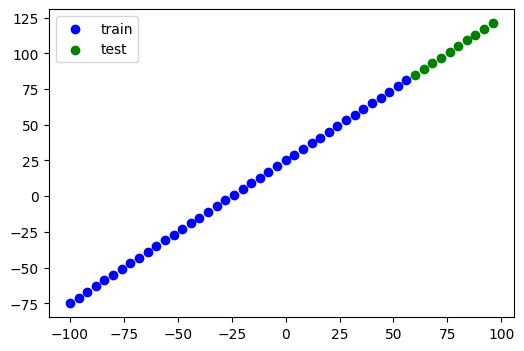

In [ ]:
train_test_plot(x = X, y = y)

In [ ]:
# checking data shapes
X.shape , y.shape

(TensorShape([50]), TensorShape([50]))

In [ ]:
X.shape , y.shape

(TensorShape([50]), TensorShape([50]))

## Build model

1. Creating model -
2. Compiling model -
3. fiting model -

A - `model_0`

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model using Sequentional API
model_0 = tf.keras.Sequential([
    tf.keras.Input(shape = [1] ,name = "input_layer") ,
    tf.keras.layers.Dense(50 , name = "hidden_layer") ,
    tf.keras.layers.Dense(1 , name  = "output_layer")
] , name  = "model_0")
# 2 . Compile model
model_0.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam(lr = 1) ,
                metrics = ["mae"])
# 3 . fit model
model_0.fit(X_train , y_train , epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 41.5973 - mae: 41.5973
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 40.2562 - mae: 40.2562
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 38.9746 - mae: 38.9746
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 37.6732 - mae: 37.6732
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 36.3712 - mae: 36.3712
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 35.1127 - mae: 35.1127
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 33.8605 - mae: 33.8605
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 32.5330 - mae: 32.5330
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 31.3128 - mae: 31.3128
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 30.1661 - mae: 30.1661
Epoch 11/500
2/2 [==============================] - 0s 7ms

### model summary

In [ ]:
model_0.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


### make predictions

In [ ]:
y_test , tf.transpose(model_0(X_test))

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 85,  89,  93,  97, 101, 105, 109, 113, 117, 121], dtype=int32)>,
 <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[ 81.20795 ,  85.11648 ,  89.025   ,  92.933525,  96.84206 ,
         100.75059 , 104.659134, 108.56765 , 112.47618 , 116.384705]],
       dtype=float32)>)

### plot model prediction

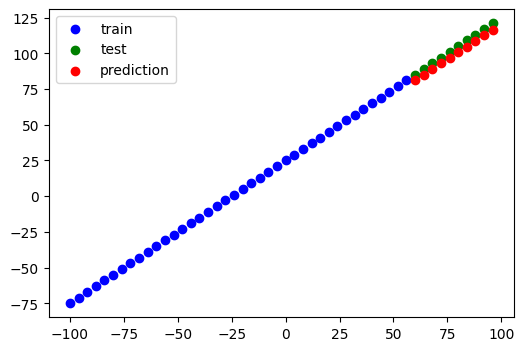

In [ ]:
prediction_0 = tf.squeeze(tf.transpose(model_0(X_test)))
train_test_plot( x = X , y = y , predict = prediction_0)

### plot model diagram

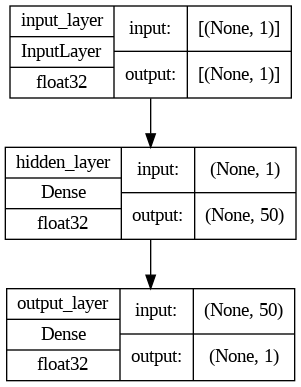

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model_0 , show_shapes = True , show_dtype = True)

B - `model_1` - another way to create model

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model using Sequentional API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50 , input_shape = [1] , name = "hidden_layer") ,
    tf.keras.layers.Dense(1 , name = "output_layer")
], name = "model_1")
# 2 . compile model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.SGD(lr = 1) ,
                metrics = ["mae"])
# 3 . fit model
model_1.fit(X_train , y_train , epochs=500 , verbose=2)

Epoch 1/500
2/2 - 0s - loss: 40.0116 - mae: 40.0116 - 435ms/epoch - 217ms/step
Epoch 2/500
2/2 - 0s - loss: 31.4514 - mae: 31.4514 - 10ms/epoch - 5ms/step
Epoch 3/500
2/2 - 0s - loss: 32.2058 - mae: 32.2058 - 11ms/epoch - 5ms/step
Epoch 4/500
2/2 - 0s - loss: 18.8573 - mae: 18.8573 - 10ms/epoch - 5ms/step
Epoch 5/500
2/2 - 0s - loss: 18.9041 - mae: 18.9041 - 10ms/epoch - 5ms/step
Epoch 6/500
2/2 - 0s - loss: 22.7319 - mae: 22.7319 - 12ms/epoch - 6ms/step
Epoch 7/500
2/2 - 0s - loss: 22.4444 - mae: 22.4444 - 11ms/epoch - 6ms/step
Epoch 8/500
2/2 - 0s - loss: 22.2748 - mae: 22.2748 - 11ms/epoch - 5ms/step
Epoch 9/500
2/2 - 0s - loss: 43.9169 - mae: 43.9169 - 19ms/epoch - 9ms/step
Epoch 10/500
2/2 - 0s - loss: 26.7449 - mae: 26.7449 - 9ms/epoch - 5ms/step
Epoch 11/500
2/2 - 0s - loss: 20.3916 - mae: 20.3916 - 8ms/epoch - 4ms/step
Epoch 12/500
2/2 - 0s - loss: 21.3044 - mae: 21.3044 - 10ms/epoch - 5ms/step
Epoch 13/500
2/2 - 0s - loss: 24.0587 - mae: 24.0587 - 9ms/epoch - 4ms/step
Epoch 14

**Note :** we also would look at some features of `model_1` for further learning

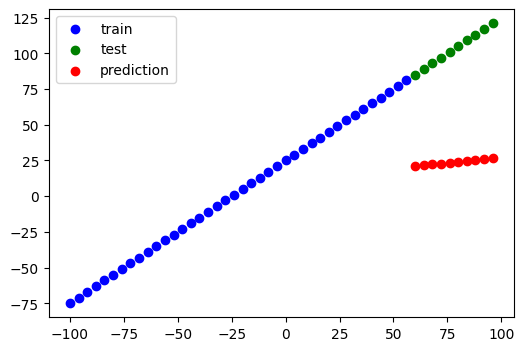

In [ ]:
# plot model prediction
prediction_1 = tf.squeeze(tf.transpose(model_1(X_test)))
train_test_plot( x = X , y = y , predict = prediction_1)

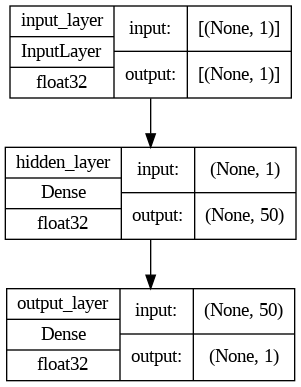

In [ ]:
plot_model(model = model_0 , show_shapes = True , show_dtype = True)

**Note :** in the second model created while we combined hidden layer and input layer tensorflow automatically adjusted `input_layer` name and it's not related to us and happen automatically

## evaluating model predictions with regression evaluating metrices

* MAE - Mean Absolute Error
* MSE - Mean Square Error

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true = y_test , y_pred = tf.squeeze(tf.transpose(model_0(X_test))))
mae.numpy()

4.2036734

In [ ]:
mse  = tf.metrics.mean_squared_error(y_true = y_test , y_pred = tf.squeeze(tf.transpose(model_0(X_test))))
mse.numpy()

17.739897

In [ ]:
# creating functions for mae and mse
def MAE(y_true , y_pred) :
  return tf.metrics.mean_absolute_error(y_true = y_true , y_pred = tf.squeeze(tf.transpose(y_pred))).numpy()
def MSE(y_true , y_pred) :
  return tf.metrics.mean_squared_error(y_true = y_true , y_pred = tf.squeeze(tf.transpose(y_pred))).numpy()

In [ ]:
MAE(y_test , model_0(X_test)) , MSE(y_test , model_0(X_test))

(4.2036734, 17.739897)

**Note :** we could use `evalute` method on model instance to evaluate our model

In [ ]:
model_0.evaluate(X_test , y_test)

1/1 [==============================] - 0s 164ms/step - loss: 4.2037 - mae: 4.2037


[4.203671455383301, 4.203671455383301]

## Comparing model results

In [ ]:
model_results = [[MAE(y_test , model_0(X_test)) , MSE(y_test , model_0(X_test))] ,
                 [MAE(y_test , model_1(X_test)) , MSE(y_test , model_1(X_test))]]
tabel = pd.DataFrame(model_results , columns = ["mae" , "mse"] , index = ["model_0" , "model_1"])
tabel

,mae,mse
model_0,4.203673,17.739897
model_1,79.205070,6366.138184


it's abosolutly obvious that our first model `model_0` better performes

## Save model

there are two formats we could save our models :

* `SaveModel` format
* `HDF5` format

saving models allows us to use them outside of google colab like : mobile app or web application

### 1 . `SaveModel` format

In [ ]:
model_0.save("SaveModel_format")

### 2 . `HDF5` format

In [ ]:
model_0.save("HDF5_format.h5")

## Load a saved model

In [ ]:
SaveModel_loaded = tf.keras.models.load_model("SaveModel_format")
SaveModel_loaded.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
HDF5_loaded = tf.keras.models.load_model("HDF5_format.h5")
HDF5_loaded.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_0(X_test) == HDF5_loaded(X_test)

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

## Download model (or files) from google colab

In [ ]:
!pwd

/content


In [ ]:
!ls

HDF5_format.h5	model.png  sample_data	SaveModel_format


### download a file from google colab

In [ ]:
from google.colab import files
files.download("HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### save a file from google colab to google drive

In [ ]:
# first mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "HDF5_format.h5" "/content/drive/MyDrive/test"

In [ ]:
!ls "/content/drive/MyDrive"

'Colab Notebooks'
 How.I.Met.Your.Mother.S02E01.1080p.WEB-DL.6CH.ValaMovie.SoftSub.mkv
 How.I.Met.Your.Mother.S02E02.1080p.WEB-DL.6CH.ValaMovie.SoftSub.mkv
 How.I.Met.Your.Mother.S02E03.1080p.WEB-DL.6CH.ValaMovie.SoftSub.mkv
 How.I.Met.Your.Mother.S02E04.1080p.WEB-DL.6CH.ValaMovie.SoftSub.mkv
 test


## A larger example